In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

import openpyxl as oppl

In [2]:
import os

In [3]:
# define path to Indian city directories
# assumption: initial current working directory has "air_quality_macrox" in it
path = "air_quality_macrox/official_air_pollution_IN"
# make working directory "official_air_pollution_IN"
os.chdir(path)

In [4]:
# for every city load station data
dir_list = []

# initialize list of series for NO2, SO2, and PM2.5
no2_series = []
so2_series = []
pm_series  = []
co_series =  []

for dir_name in os.listdir(os.getcwd()):
    # create list of directory names--city names
    dir_list.append(dir_name)
    os.chdir(dir_name)
    
    no2_number = 1
    so2_number = 1
    pm_number =  1
    co_number =  1
    
    for file in os.listdir(os.getcwd()):
        # load workbook
        w = oppl.load_workbook(file)
        # make a list of which gases are measured
        wb = w.active
        g = []
        for col in wb.iter_cols(3,6):
            g.append(col[16].value)
        # remove None's from gases if the gas is not measured
        gases = [x for x in g if x is not None]
        
        assert 'NO2' in gases or 'SO2' in gases or 'PM2.5' in gases or 'CO' in gases, f'file_{file}'
        
        column = 3
        for gas in gases:
            
            #create a series for the station of gas measurements
            g_values = []
            for row in range(17, wb.max_row):
            # only look at column with the relevant gas
                for col in wb.iter_cols(column, column):
                    g_values.append(col[row].value)
                    
            if gas == 'NO2':
                ser = pd.Series(g_values, name=f'{dir_name}_{gas}_{no2_number}')
                no2_series.append(ser)
                no2_number += 1
                
            elif gas == 'PM2.5':
                ser = pd.Series(g_values, name=f'{dir_name}_{gas}_{pm_number}')
                pm_series.append(ser)
                pm_number += 1
                
            elif gas == 'SO2':
                ser = pd.Series(g_values, name=f'{dir_name}_{gas}_{so2_number}')
                so2_series.append(ser)
                so2_number += 1
                
            else:
                ser = pd.Series(g_values, name=f'{dir_name}_{gas}_{co_number}')
                co_series.append(ser)
                co_number += 1
                
        column += 1
            
    os.chdir('..')
            
            
    

In [5]:
# extract dates from last station processed and convert to a pandas series
date_values = []
for row in range(17, wb.max_row):
    
    for col in wb.iter_cols(1, 1):
        date_values.append(col[row].value)
ser_date = pd.Series(date_values, name='date')
ser_date

0       01-01-2018 00:00
1       02-01-2018 00:00
2       03-01-2018 00:00
3       04-01-2018 00:00
4       05-01-2018 00:00
              ...       
1690    18-08-2022 00:00
1691    19-08-2022 00:00
1692    20-08-2022 00:00
1693    21-08-2022 00:00
1694    22-08-2022 00:00
Name: date, Length: 1695, dtype: object

In [7]:
len(no2_series)

179

In [8]:
no2_series.insert(0,ser_date)
so2_series.insert(0,ser_date)
pm_series.insert(0,ser_date)
co_series.insert(0,ser_date)

In [12]:
len(no2_series)

180

In [21]:
# create dataframes, concatenating all the individual pandas series
df_no2_official = pd.concat(no2_series, axis=1)
df_so2_official = pd.concat(so2_series, axis=1)
df_pm_official = pd.concat(pm_series, axis=1)
df_co_official = pd.concat(co_series, axis=1)

In [35]:
sizes = []
for s in no2_series:
    sizes.append(s.size)
min(sizes)

1692

In [24]:
sizes = []
for s in so2_series:
    sizes.append(s.size)
min(sizes)

1695

In [25]:
sizes = []
for s in pm_series:
    sizes.append(s.size)
min(sizes)

1695

In [26]:
sizes = []
for s in co_series:
    sizes.append(s.size)
min(sizes)

1695

In [27]:
# create consistent size dataframe by droping some rows
df_so2_official.drop(df_so2_official.tail(3).index, inplace=True)
df_pm_official.drop(df_pm_official.tail(3).index, inplace=True)
df_co_official.drop(df_co_official.tail(3).index, inplace=True)

In [28]:
# convert date column to datetime format
df_no2_official['date'] = pd.to_datetime(df_no2_official['date'], dayfirst=True)
df_so2_official['date'] = pd.to_datetime(df_so2_official['date'], dayfirst=True)
df_pm_official['date'] = pd.to_datetime(df_pm_official['date'], dayfirst=True)
df_co_official['date'] = pd.to_datetime(df_co_official['date'], dayfirst=True)

In [29]:
# convert None to NaN
df_no2_official = df_no2_official.replace('None', np.NaN)
df_so2_official = df_so2_official.replace('None', np.NaN)
df_pm_official = df_pm_official.replace('None', np.NaN)
df_co_official = df_co_official.replace('None', np.NaN)

In [46]:
# after inspection select rows with dates up to August 21, 2022
df_no2_official = df_no2_official.iloc[0:1694]
df_so2_official = df_so2_official.iloc[0:1694]
df_pm_official = df_pm_official.iloc[0:1694]
df_co_official = df_co_official.iloc[0:1694]


In [49]:
os.chdir('..')
os.chdir('..')

In [50]:
df_no2_official.to_csv('no2_official.csv', encoding='utf-8', index=False)

In [51]:
df_so2_official.to_csv('so2_official.csv', encoding='utf-8', index=False)
df_pm_official.to_csv('pm_official.csv', encoding='utf-8', index=False)
df_co_official.to_csv('co_official.csv', encoding='utf-8', index=False)

In [57]:
print(f'no2 dataframe dimensions: {df_no2_official.shape}')
print(f'so2 dataframe dimensions: {df_so2_official.shape}')
print(f'pm dataframe dimensions: {df_pm_official.shape}')
print(f'co dataframe dimensions: {df_co_official.shape}')

no2 dataframe dimensions: (1694, 180)
so2 dataframe dimensions: (1694, 168)
pm dataframe dimensions: (1694, 175)
co dataframe dimensions: (1694, 82)


<AxesSubplot:>

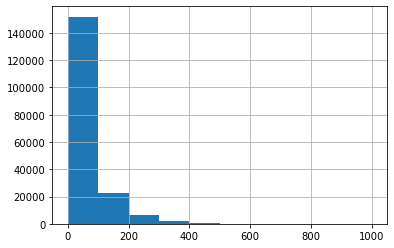

In [61]:
# investigate distributions of data
df_no2_official.iloc[:,1:181].stack().hist()

In [62]:
# Investigate higher values for no2
df_no2_official.iloc[:,1:181].to_numpy()[df_no2_official.iloc[:,1:180].to_numpy() > 600]

array([758.71, 793.55, 702.68, 684.93, 636.01, 630.12, 602.15, 602.43,
       999.99, 761.95, 954.72, 606.41, 631.85, 601.49, 689.1 , 650.88,
       696.78, 630.65, 712.11, 700.06, 624.04, 609.18, 658.26, 608.91,
       621.06, 633.95, 650.05, 698.96, 608.43, 616.79, 610.02, 750.47,
       817.6 , 833.8 ])

<AxesSubplot:>

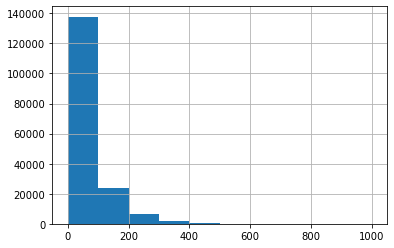

In [63]:
# so2
df_so2_official.iloc[:,1:169].stack().hist()

In [64]:
# Investigate higher values for so2
df_so2_official.iloc[:,1:169].to_numpy()[df_so2_official.iloc[:,1:180].to_numpy() > 600]

array([646.25, 758.71, 787.29, 959.88, 606.46, 793.55, 858.63, 702.68,
       684.93, 636.01, 630.12, 602.15, 602.43, 631.62, 968.33, 999.99,
       625.88, 761.95, 954.72, 914.64, 917.99, 606.41, 631.85, 601.49,
       689.1 , 650.88, 696.78, 630.65, 712.11, 700.06, 624.04, 609.18,
       658.26, 608.91, 621.06, 633.95, 650.05, 698.96, 608.43, 616.79,
       610.02, 659.29, 615.48, 613.17, 750.47, 817.6 , 833.8 ])

<AxesSubplot:>

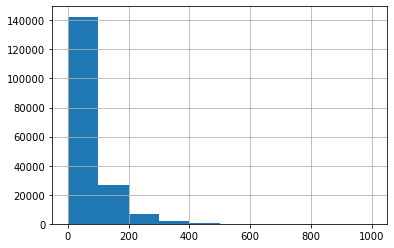

In [65]:
# pm2.5
df_pm_official.iloc[:,1:176].stack().hist()

In [67]:
# Investigate higher values for pm2.5
df_pm_official.iloc[:,1:176].to_numpy()[df_pm_official.iloc[:,1:176].to_numpy() > 600]

array([646.25, 758.71, 787.29, 959.88, 606.46, 793.55, 858.63, 702.68,
       684.93, 636.01, 630.12, 602.15, 602.43, 631.62, 968.33, 999.99,
       625.88, 761.95, 954.72, 914.64, 917.99, 606.41, 631.85, 601.49,
       689.1 , 650.88, 696.78, 630.65, 712.11, 700.06, 624.04, 609.18,
       658.26, 608.91, 621.06, 633.95, 650.05, 698.96, 608.43, 616.79,
       610.02, 659.29, 615.48, 613.17, 750.47, 817.6 , 833.8 , 658.48])

<AxesSubplot:>

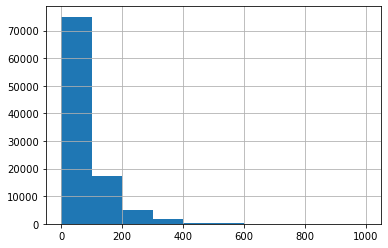

In [68]:
# co
df_co_official.iloc[:,1:83].stack().hist()

In [69]:
# Investigate higher values for co
df_co_official.iloc[:,1:176].to_numpy()[df_co_official.iloc[:,1:176].to_numpy() > 600]

array([606.46, 606.46, 793.55, 684.93, 636.01, 630.12, 602.15, 602.43,
       999.99, 761.95, 954.72, 606.41, 631.85, 601.49, 689.1 , 650.88,
       696.78, 630.65, 712.11, 624.04, 609.18, 658.26, 608.91, 621.06,
       633.95, 650.05, 698.96, 608.43, 616.79, 610.02, 659.29, 659.29,
       615.48, 615.48, 750.47, 817.6 , 833.8 ])

### Reference for missingno library
Bilogur, (2018). Missingno: a missing data visualization suite. Journal of Open Source Software, 3(22), 547, https://doi.org/10.21105/joss.00547

##### Note: White areas represent missing values (NaN)

<AxesSubplot:>

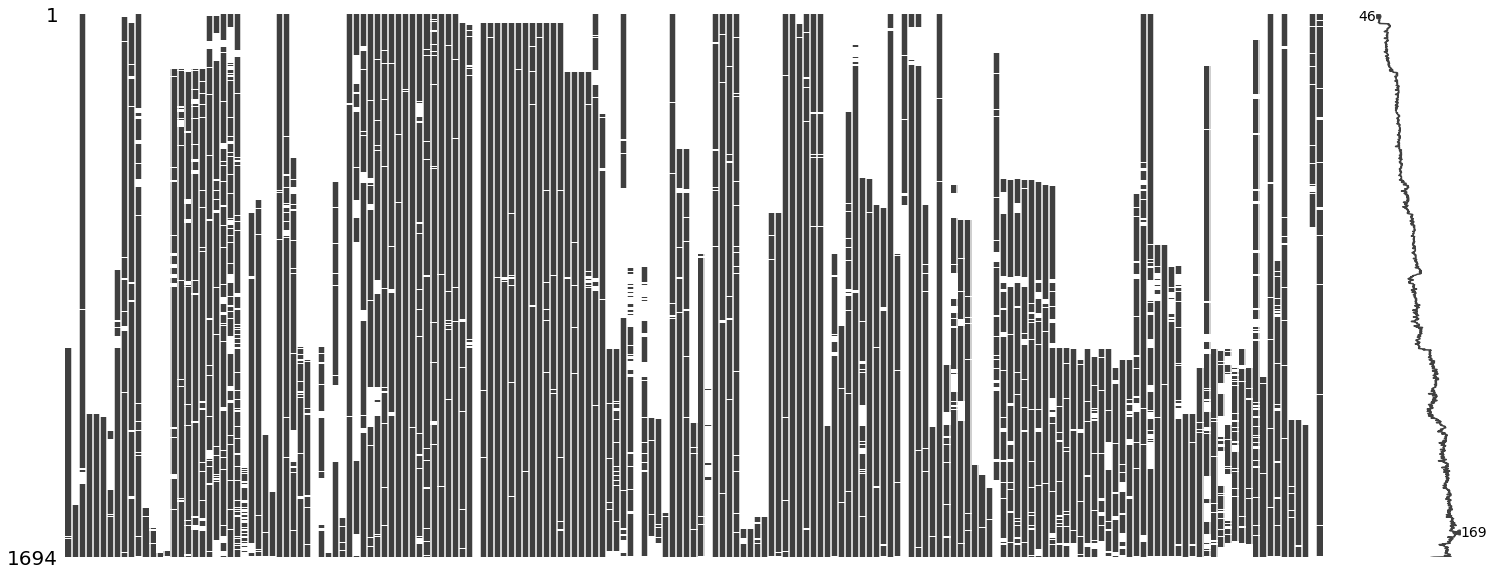

In [81]:
# no2
msno.matrix(df_no2_official.iloc[:,1:181])

<AxesSubplot:>

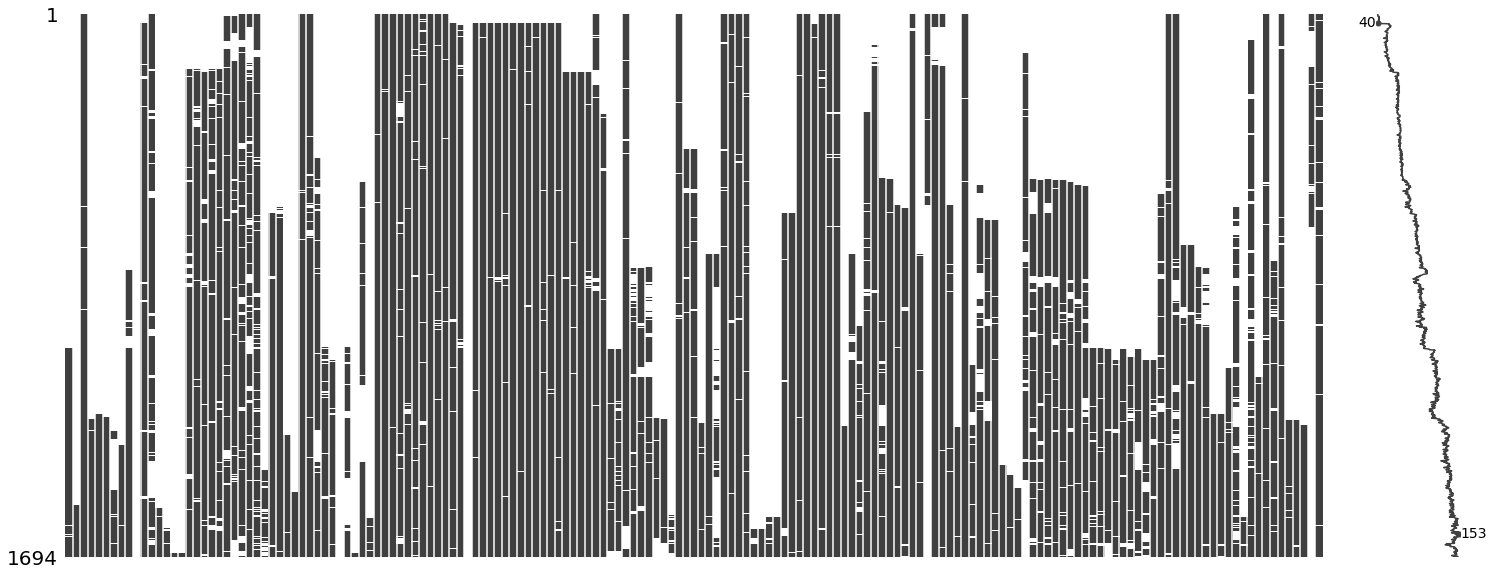

In [71]:
# so2
msno.matrix(df_so2_official.iloc[:,1:169])

<AxesSubplot:>

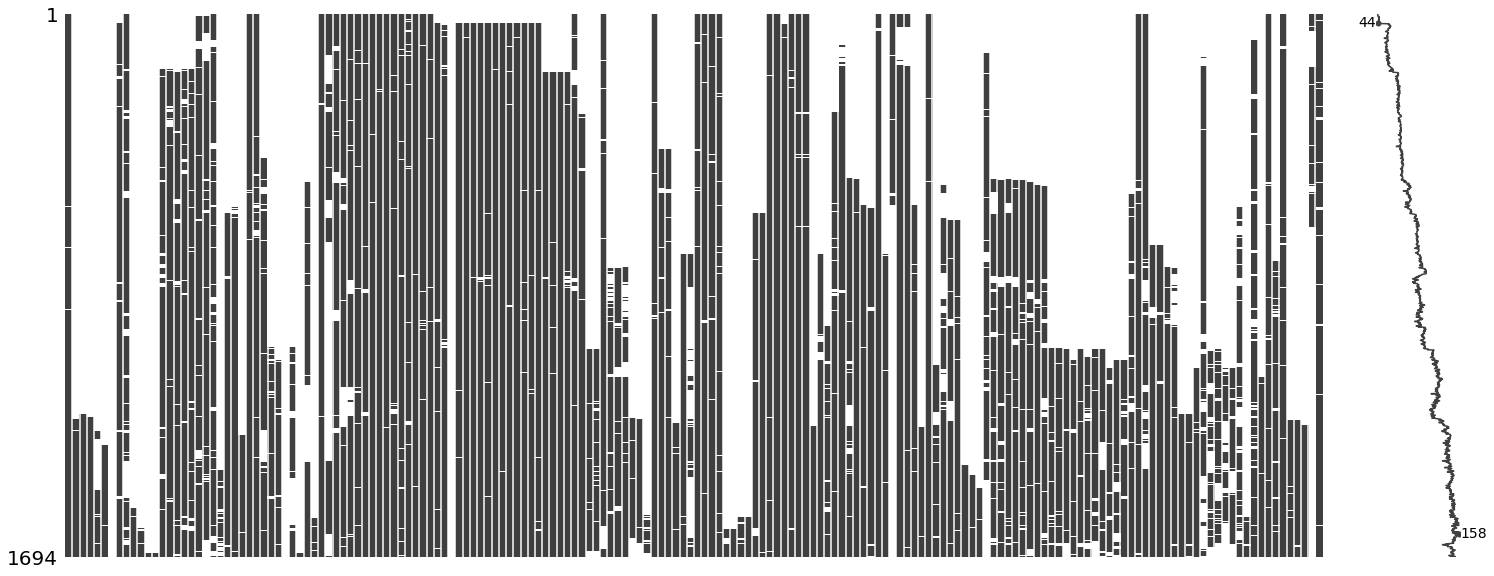

In [72]:
# pm2.5
msno.matrix(df_pm_official.iloc[:,1:176])

<AxesSubplot:>

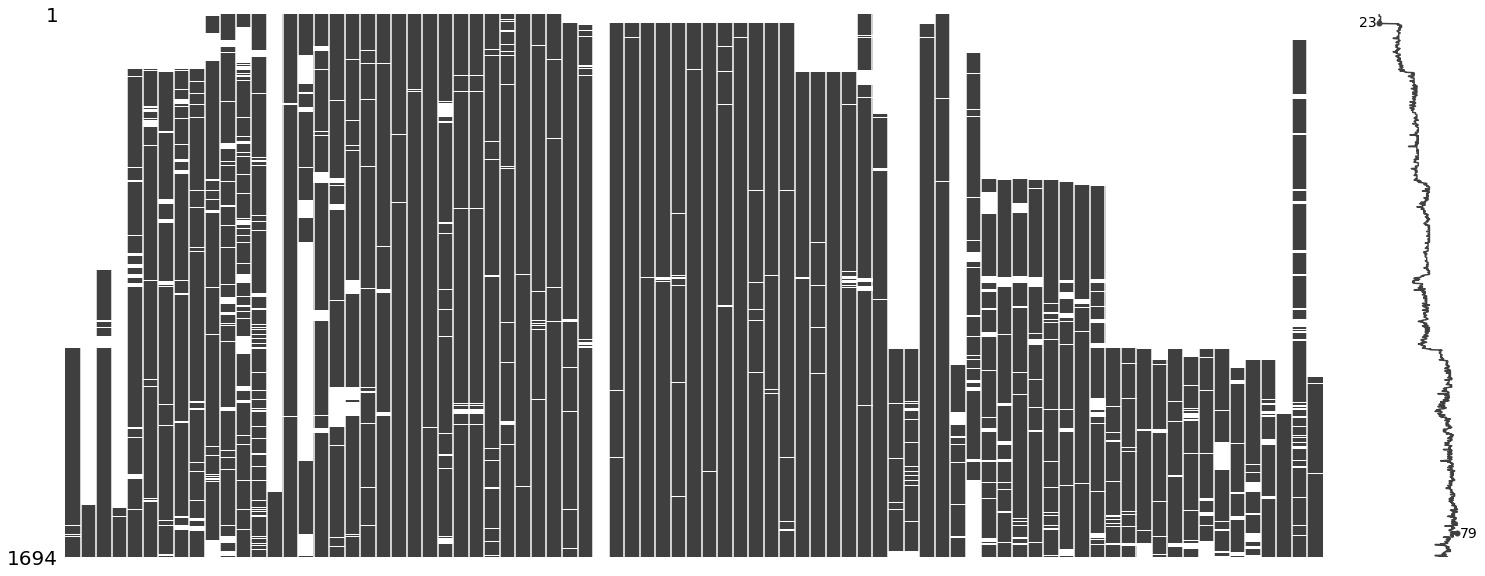

In [73]:
# co
msno.matrix(df_co_official.iloc[:,1:83])


In [85]:
# https://stackoverflow.com/questions/14849293/
# find-all-index-position-in-list-based-on-partial-string-inside-item-in-list
# find index position of Dehli stations for NO2

indices = [i for i, s in enumerate(list(df_no2_official.columns)) if 'Delhi' in s]

In [140]:
# for each gas determine if measurement began to be taken by the first month
# If the station did not exist, it can not be included for prediection of the 2018
# to 2021 API reconstruction
non_nan_no2 = []
n = df_no2_official.shape[1]
for i in range(n):
    non_nan_no2.append(not df_no2_official.iloc[1:30,i].isnull().all())
print(f'number of stations with NO2 measurements in Jan 2018: {sum(non_nan_no2)}')

non_nan_so2 = []
n = df_so2_official.shape[1]
for i in range(n):
    non_nan_so2.append(not df_so2_official.iloc[1:30,i].isnull().all())
print(f'number of stations with SO2 measurements in Jan 2018: {sum(non_nan_so2)}')

non_nan_pm = []
n = df_pm_official.shape[1]
for i in range(n):
    non_nan_pm.append(not df_pm_official.iloc[1:30,i].isnull().all())
print(f'number of stations with PM2.5 measurements in Jan 2018: {sum(non_nan_pm)}')

non_nan_co = []
n = df_co_official.shape[1]
for i in range(n):
    non_nan_co.append(not df_co_official.iloc[1:30,i].isnull().all())
print(f'number of stations with CO measurements in Jan 2018: {sum(non_nan_co)}')

number of stations with NO2 measurements in Jan 2018: 50
number of stations with SO2 measurements in Jan 2018: 43
number of stations with PM2.5 measurements in Jan 2018: 47
number of stations with CO measurements in Jan 2018: 25


In [135]:
# keep date column
non_nan_no2[0] = True
non_nan_so2[0] = True
non_nan_pm[0] = True
non_nan_co[0] = True

In [136]:
# create new reduced dataframes only containing stations that has some
# measurements in Jan 2018
df_no2_official_red = df_no2_official.iloc[:,non_nan_no2]
df_so2_official_red = df_so2_official.iloc[:,non_nan_so2]
df_pm_official_red = df_pm_official.iloc[:,non_nan_pm]
df_co_official_red = df_co_official.iloc[:,non_nan_co]

In [139]:
df_so2_official_red.shape

(1694, 43)

In [138]:
df_no2_official_red.head()

,date,Agra_NO2_1,Amritsar_NO2_1,Aurangabad_NO2_1,Bengaluru_NO2_6,Bengaluru_NO2_7,Bengaluru_NO2_8,Bengaluru_NO2_9,Bengaluru_NO2_10,Chennai_NO2_1,...,Lucknow_NO2_1,Lucknow_NO2_2,Lucknow_NO2_3,Ludhiana_NO2_1,Nashik_NO2_1,Patna_NO2_1,Thiruvananthapuram_NO2_1,Varanasi_NO2_1,Vijayawada_NO2_1,Visakhapatnam_NO2_1
0,2018-01-01,50.29,30.43,53.19,NaN,NaN,39.43,4.91,1.17,48.26,...,167.02,121.03,188.49,155.86,30.28,47.59,8.98,191.58,54.85,23.00
1,2018-01-02,51.22,30.82,51.09,NaN,NaN,35.23,4.89,1.25,40.28,...,258.73,175.33,191.16,96.06,37.01,21.71,7.37,154.23,53.66,29.15
2,2018-01-03,54.00,29.99,52.58,NaN,NaN,28.95,5.12,1.23,43.46,...,213.13,172.73,278.93,73.89,42.68,88.46,10.50,160.00,75.08,56.69
3,2018-01-04,50.87,NaN,51.63,NaN,NaN,23.96,4.79,2.04,59.27,...,239.83,193.08,295.48,116.61,35.47,52.59,17.29,147.29,85.36,84.75
4,2018-01-05,53.11,NaN,59.25,NaN,NaN,24.43,5.06,7.28,63.01,...,230.24,195.22,268.56,120.90,31.97,20.20,15.07,107.49,61.65,60.04


<AxesSubplot:>

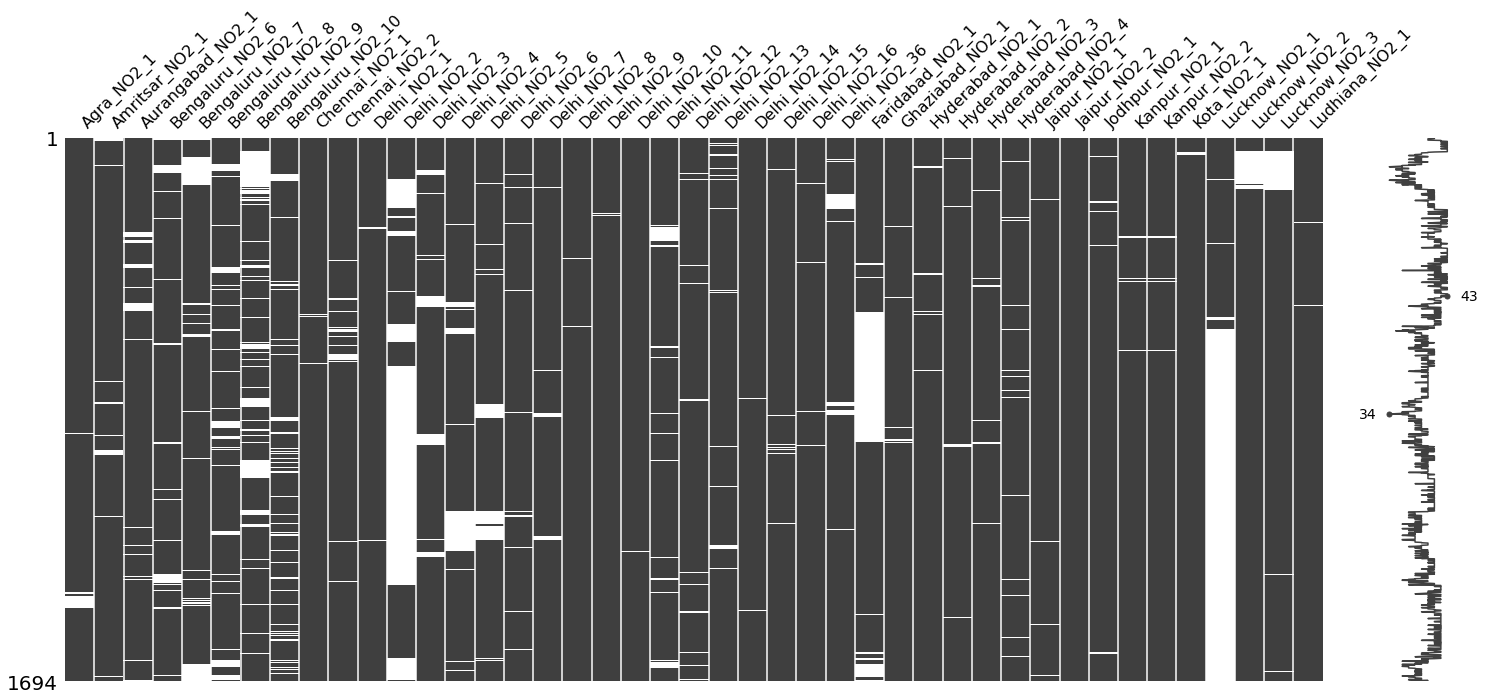

In [141]:
msno.matrix(df_no2_official_red.iloc[:,1:df_so2_official_red.shape[1]+1])

<AxesSubplot:>

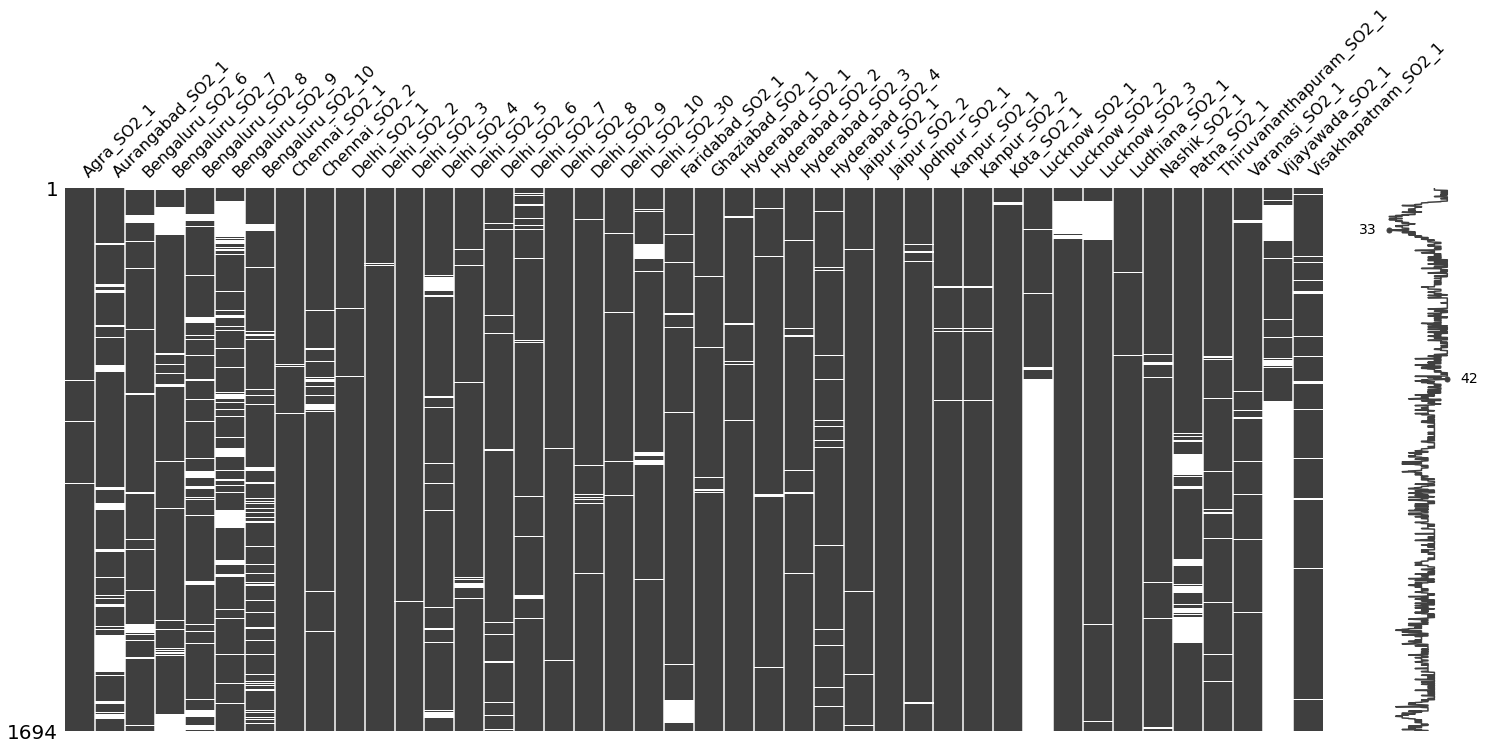

In [142]:
msno.matrix(df_so2_official_red.iloc[:,1:df_so2_official_red.shape[1]+1])

<AxesSubplot:>

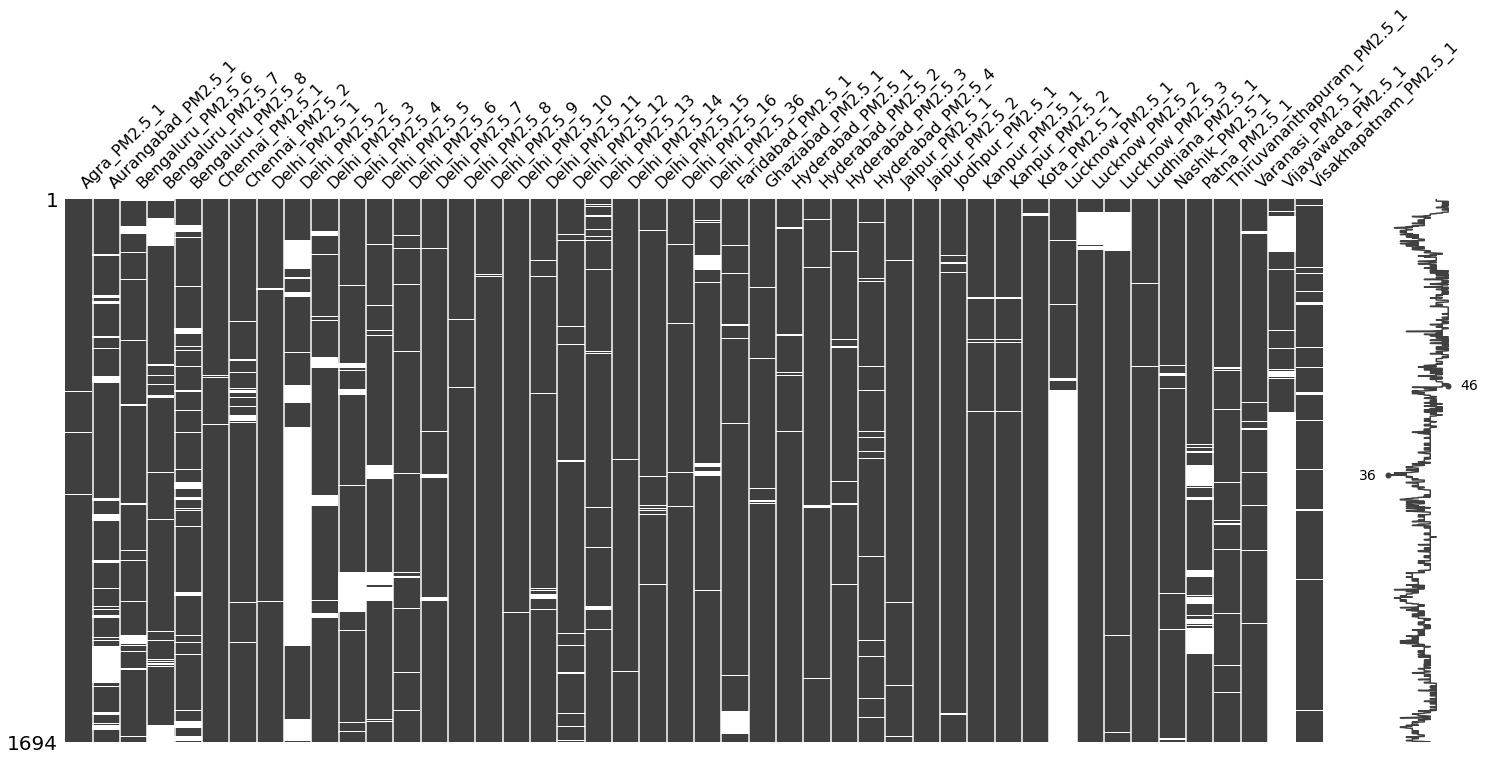

In [143]:
msno.matrix(df_pm_official_red.iloc[:,1:df_pm_official_red.shape[1]+1])

<AxesSubplot:>

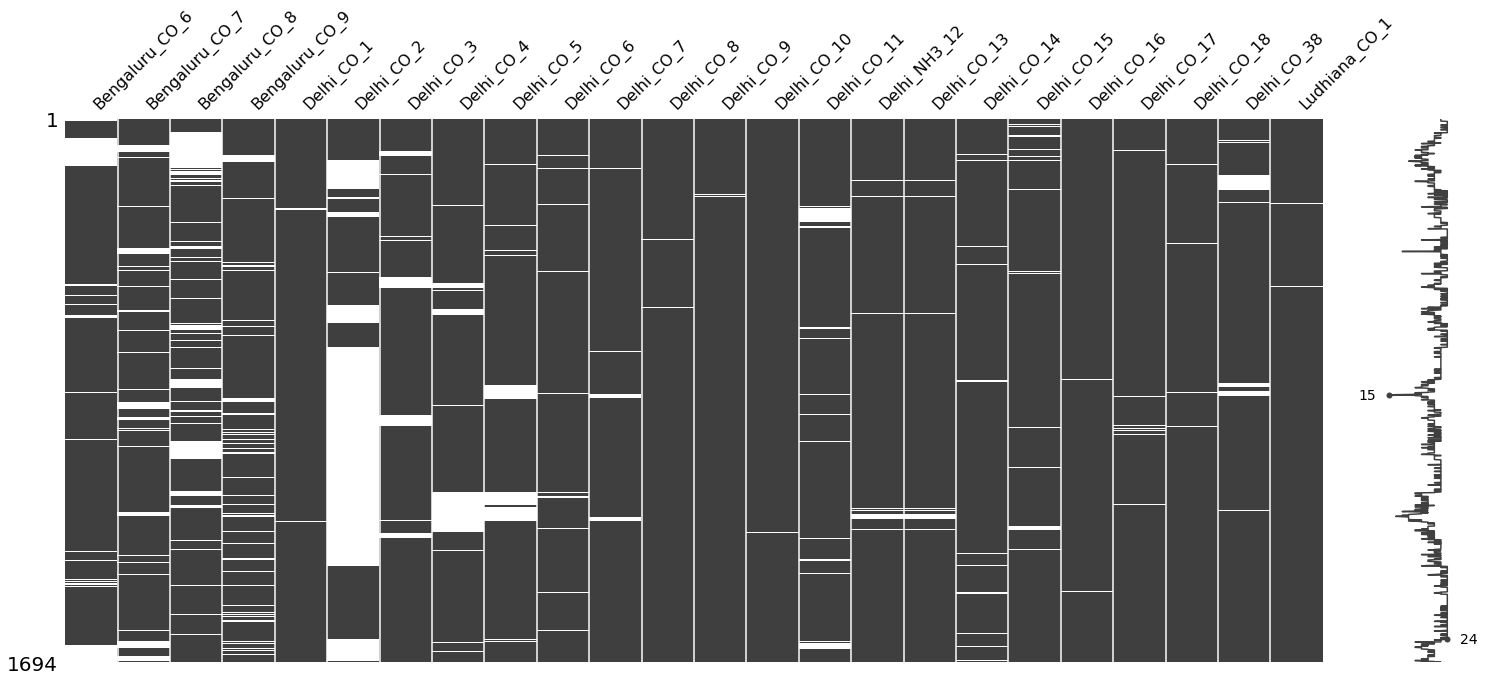

In [144]:
msno.matrix(df_co_official_red.iloc[:,1:df_co_official_red.shape[1]+1])

In [147]:
df_no2_official_red.to_csv('no2_official_red.csv', encoding='utf-8', index=False)
df_so2_official_red.to_csv('so2_official_red.csv', encoding='utf-8', index=False)
df_pm_official_red.to_csv('pm_official_red.csv', encoding='utf-8', index=False)
df_co_official_red.to_csv('co_official_red.csv', encoding='utf-8', index=False)